# connect to database

In [1]:
import olca
import pandas as pd
import requests
import time
pd.set_option('display.max_colwidth', None)

client = olca.Client(8080)
client 

# get all process UUIDs into a dataframe

In [2]:
all_processes = client.get_all(olca.Process)

names = []
uuids = []
main_cat = []
geoloc = []

for elem in all_processes:
    try:
        names.append(elem.name)
        uuids.append(elem.id)
        main_cat.append(elem.category.name)
        geoloc.append(elem.location.name)
    except AttributeError:
        names.append(elem.name)
        uuids.append(elem.id)
        main_cat.append(elem.category.name)
        geoloc.append('None')
    
df_all_proc = pd.DataFrame(list(zip(names,
                                   uuids,
                                   main_cat,
                                   geoloc)),
                               columns=['name', 'uuid', 'category', 'location'])
df_all_proc 

,name,uuid,category,location
0,"Electricity Mix, consumption mix, at consumer, AC, 230-240V",00043bd2-4563-4d73-8df8-b84b5d8902fc,Electricity,United Kingdom
1,"Process steam from natural gas, consumption mix, at plant, heat plant, MJ",00174864-910e-4952-8f02-6ea3a2efa77b,Heat and steam,Slovakia
2,"Electricity Mix, consumption mix, at consumer, AC, < 1kV",001b3cb7-b868-4061-8a91-3e6d7bcc90c6,Electricity,EU-27
3,"Process steam from Light fuel oil 90%, consumption mix, at power plant, heat plant, MJ, 90 % efficiency",00f9cd63-cba5-4c94-ade3-a4248a9b9dc2,Heat and steam,EU-27
4,"Polyethylene terephthalate (PET) granulate, production mix, at plant, amorphous",028b2915-00a5-4967-b356-34bce19960c3,Plastics,Europe
...,...,...,...,...
603,Dummy_Chemicals (unspecified),c4b74d4f-09b4-44e2-b023-d58df3bfa277,Dummy processes,None
604,Dummy_Chemicals (unspecified),c4b74d4f-09b4-44e2-b023-d58df3bfa277,Dummy processes,None
605,Dummy_Mineral waste,130605cf-52f6-4d73-a4ff-f8ee0fac9730,Dummy processes,None
606,Dummy_Mineral waste,130605cf-52f6-4d73-a4ff-f8ee0fac9730,Dummy processes,None


In [3]:
#drop dummy
df_dummy = df_all_proc[ df_all_proc['category'] == 'Dummy processes' ].index
df_all_proc.drop(df_dummy, inplace = True)
df_all_proc 

,name,uuid,category,location
0,"Electricity Mix, consumption mix, at consumer, AC, 230-240V",00043bd2-4563-4d73-8df8-b84b5d8902fc,Electricity,United Kingdom
1,"Process steam from natural gas, consumption mix, at plant, heat plant, MJ",00174864-910e-4952-8f02-6ea3a2efa77b,Heat and steam,Slovakia
2,"Electricity Mix, consumption mix, at consumer, AC, < 1kV",001b3cb7-b868-4061-8a91-3e6d7bcc90c6,Electricity,EU-27
3,"Process steam from Light fuel oil 90%, consumption mix, at power plant, heat plant, MJ, 90 % efficiency",00f9cd63-cba5-4c94-ade3-a4248a9b9dc2,Heat and steam,EU-27
4,"Polyethylene terephthalate (PET) granulate, production mix, at plant, amorphous",028b2915-00a5-4967-b356-34bce19960c3,Plastics,Europe
...,...,...,...,...
498,"Electricity Mix, consumption mix, at consumer, AC, 220V",fde3d025-2889-4e04-a6ff-0dd9a6b79b80,Electricity,Lithuania
499,"Electricity from wind power, production mix, at power plant, AC, < 1kV",fe1c3d03-072b-4da7-8fff-3505f9b01efc,Electricity,Europe
500,"Electricity grid mix, consumption mix, at consumer, AC, 230V",fe2e54f4-5200-410f-8b97-0ed5380183ed,Electricity,Austria
501,"Process steam from natural gas 90%, consumption mix, at power plant, heat plant, MJ, 90 % efficiency",fe71f291-65d4-4c66-875f-0c737ee264d2,Heat and steam,Estonia


# build product systems for subsets of all processes

In [4]:
df_all_proc.category.unique()

array(['Electricity', 'Heat and steam', 'Plastics', 'Mechanical energy',
       'Inorganic chemicals', 'Metals and semimetals', 'Water',
       'Other mineral materials', 'Energy recycling',
       'Waste water treatment', 'Air', 'Crude oil based fuels', 'Wood',
       'Other transport', 'Organic chemicals', 'Natural gas based fuels',
       'Packaging', 'Construction', 'Paper and cardboards', 'Landfilling',
       'Glass and ceramics', 'Rail', 'Road', 'Systems',
       'Lignite based fuels', 'Hard coal based fuels'], dtype=object)

In [6]:
df_subset = df_all_proc[df_all_proc['category'] == 'Electricity']
df_subset 

,name,uuid,category,location
0,"Electricity Mix, consumption mix, at consumer, AC, 230-240V",00043bd2-4563-4d73-8df8-b84b5d8902fc,Electricity,United Kingdom
2,"Electricity Mix, consumption mix, at consumer, AC, < 1kV",001b3cb7-b868-4061-8a91-3e6d7bcc90c6,Electricity,EU-27
5,"Electricity grid mix, consumption mix, at consumer, AC, 230V",041ec348-4b41-4caa-afe6-8e322e1faa81,Electricity,Finland
6,"Electricity grid mix, consumption mix, at consumer, AC, 230V",05169f84-22bb-48aa-a054-6cb5317b7a97,Electricity,Luxembourg
8,"Electricity Mix, consumption mix, at consumer, AC, 1kV - 60kV",05c86203-18c2-4f05-9ff2-a36dd58eed76,Electricity,Slovakia
...,...,...,...,...
492,"Electricity Mix, consumption mix, at consumer, AC, 220V",fc7889ca-c29d-4266-87bc-01b0fbc01d9b,Electricity,Slovakia
498,"Electricity Mix, consumption mix, at consumer, AC, 220V",fde3d025-2889-4e04-a6ff-0dd9a6b79b80,Electricity,Lithuania
499,"Electricity from wind power, production mix, at power plant, AC, < 1kV",fe1c3d03-072b-4da7-8fff-3505f9b01efc,Electricity,Europe
500,"Electricity grid mix, consumption mix, at consumer, AC, 230V",fe2e54f4-5200-410f-8b97-0ed5380183ed,Electricity,Austria


In [7]:
for uuid in df_subset['uuid']:
    try:
        new_product_system = client.create_product_system(uuid,default_providers='only', #only connecting default providers
                                                      preferred_type='UNIT_PROCESS')
    except requests.exceptions.ConnectionError:
        time.sleep(30)
        continue 

 # get all product systems into a dataframe

In [8]:
descriptor = client.get_descriptors(olca.ProductSystem)#Flow)#/ImpactMethod)
elem_list = []
id_list = []

for elem in descriptor:
    elem_list.append(elem.name)
    id_list.append(elem.id)
df_all_ps = pd.DataFrame(list(zip(elem_list,
                                   id_list)),
                               columns=['name', 'uuid'])
df_all_ps 

,name,uuid
0,"Electricity Mix, consumption mix, at consumer, AC, 230-240V",f8256bc4-de27-43bf-b6ce-bdf3747555d5
1,"Electricity Mix, consumption mix, at consumer, AC, < 1kV",827b4b48-60d5-4f59-bcbd-1d882bca8772
2,"Electricity grid mix, consumption mix, at consumer, AC, 230V",fb360115-453c-4f39-b5aa-28594ae5677b
3,"Electricity grid mix, consumption mix, at consumer, AC, 230V",6f449d78-b034-4566-adca-b9803f5a477b
4,"Electricity Mix, consumption mix, at consumer, AC, 1kV - 60kV",fa055f0e-ee34-4ba1-8772-6a94c7db640b
...,...,...
125,"Electricity Mix, consumption mix, at consumer, AC, 220V",bc002bed-a377-4044-8b76-a70f8db6d9e8
126,"Electricity Mix, consumption mix, at consumer, AC, 220V",e69da912-c261-43fc-bff1-a938b9b55df4
127,"Electricity from wind power, production mix, at power plant, AC, < 1kV",69a3e453-336c-41ad-b488-57cc68f7d4a5
128,"Electricity grid mix, consumption mix, at consumer, AC, 230V",4db082ab-a60c-46c1-b266-8a4e1722e527


# calculate all product systems with IPCC

In [9]:
#choose method
IPCC = client.find(olca.ImpactMethod, 'IPCC 2013 GWP 100a')

In [10]:
ps_name = []
procloc = []
co2eq = []
ps_unit = []
impact_cat = []


for uuid in df_all_ps['uuid']:
    try:
        setup = olca.CalculationSetup()
        setup.product_system = client.get(olca.ProductSystem, uuid)

        setup.calculation_type = olca.CalculationType.UPSTREAM_ANALYSIS
        setup.amount = 1
        setup.impact_method = IPCC

        calc_result = client.calculate(setup)
        #### watch out if [7] is GWP for you as well ...
        indicator_result = calc_result.impact_results[0].value
        category = calc_result.impact_results[0].impact_category.name
        client.dispose(calc_result)

        ps_name.append(setup.product_system.name)
        cache = client.get(olca.Process, setup.product_system.reference_process.id)
        procloc.append(cache.location.name)
        co2eq.append(indicator_result)
        ps_unit.append(setup.product_system.target_unit.name)
        impact_cat.append(category)

    except requests.exceptions.ConnectionError:
        time.sleep(30)
        continue

        
df_results = pd.DataFrame(list(zip(ps_name,
                                   procloc,
                                   co2eq,
                                  ps_unit,
                                  impact_cat)),
                               columns=['name', 'location', 'GWP result [kg CO2eq]', 'per 1 ...', 'calculated with'])
df_results

,name,location,GWP result [kg CO2eq],per 1 ...,calculated with
0,"Electricity Mix, consumption mix, at consumer, AC, 230-240V",United Kingdom,0.186106,MJ,IPCC GWP 100a
1,"Electricity Mix, consumption mix, at consumer, AC, < 1kV",EU-27,0.165503,MJ,IPCC GWP 100a
2,"Electricity grid mix, consumption mix, at consumer, AC, 230V",Finland,0.085663,MJ,IPCC GWP 100a
3,"Electricity grid mix, consumption mix, at consumer, AC, 230V",Luxembourg,0.148371,MJ,IPCC GWP 100a
4,"Electricity Mix, consumption mix, at consumer, AC, 1kV - 60kV",Slovakia,0.097987,MJ,IPCC GWP 100a
...,...,...,...,...,...
125,"Electricity Mix, consumption mix, at consumer, AC, 220V",Slovakia,0.102329,MJ,IPCC GWP 100a
126,"Electricity Mix, consumption mix, at consumer, AC, 220V",Lithuania,0.056552,MJ,IPCC GWP 100a
127,"Electricity from wind power, production mix, at power plant, AC, < 1kV",Europe,0.001846,MJ,IPCC GWP 100a
128,"Electricity grid mix, consumption mix, at consumer, AC, 230V",Austria,0.101140,MJ,IPCC GWP 100a


In [11]:
df_results.to_excel('elcd_gwp_elec.xlsx')

In [12]:
df_results = df_results.sort_values(by='location')#, inplace=True)
df_results.head(3)

,name,location,GWP result [kg CO2eq],per 1 ...,calculated with
128,"Electricity grid mix, consumption mix, at consumer, AC, 230V",Austria,0.101140,MJ,IPCC GWP 100a
115,"Electricity grid mix 1kV-60kV, consumption mix, at consumer, AC, 1kV - 60kV",Austria,0.095162,MJ,IPCC GWP 100a
124,"Electricity Mix, consumption mix, at consumer, AC, 230V",Austria,0.094562,MJ,IPCC GWP 100a


In [13]:
import seaborn as sns
from matplotlib import pyplot as plt

<Figure size 432x288 with 0 Axes>

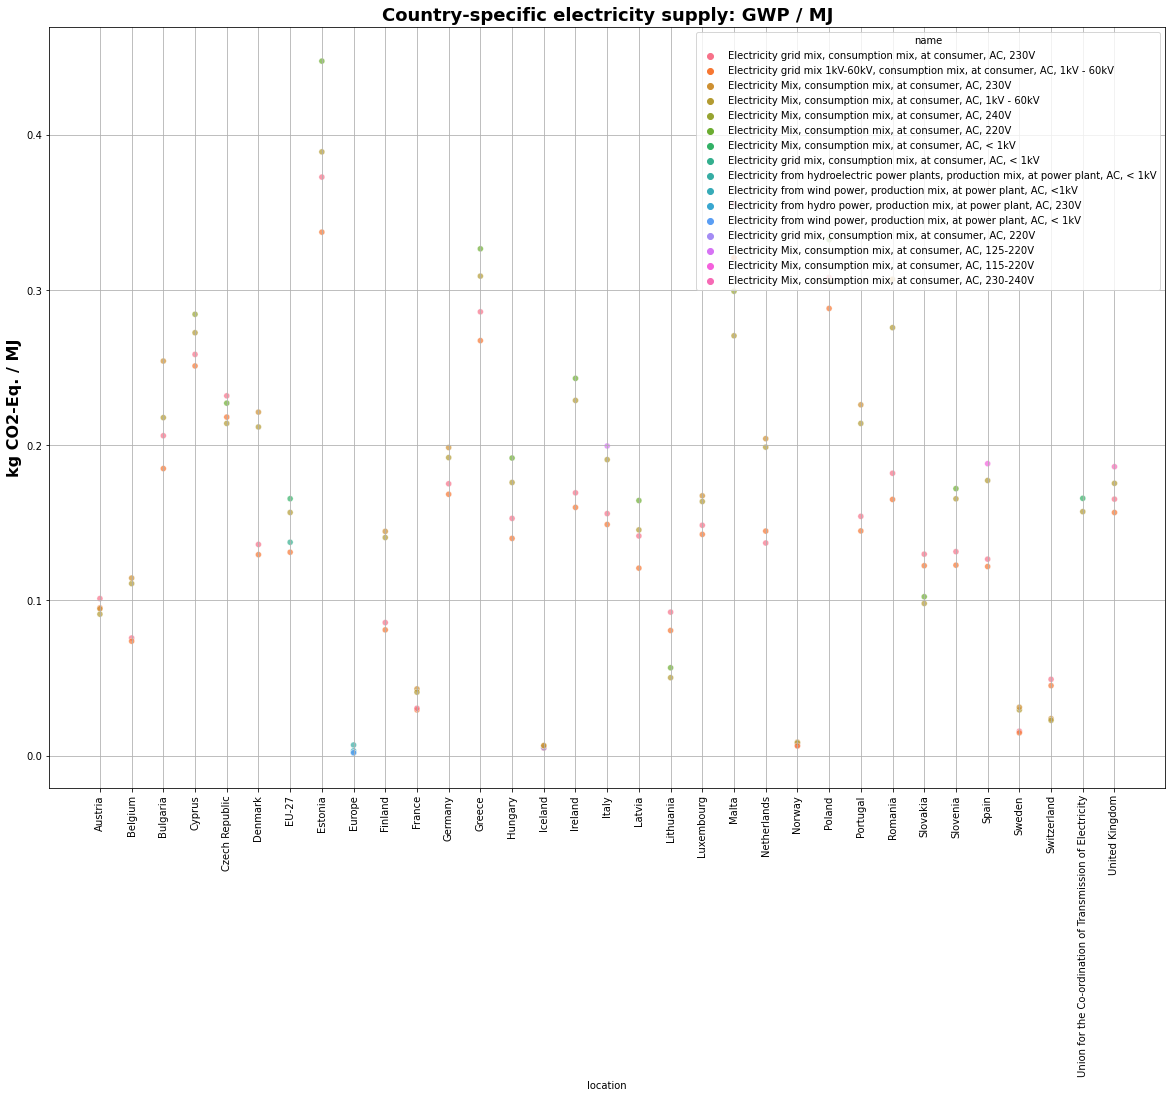

In [14]:
plt.tight_layout()
plt.figure(figsize=(20,14))
plt.ylabel('kg CO2-Eq. / MJ', fontweight='bold', fontsize=16)
plt.grid(True)

sns.scatterplot(x = 'location', y = 'GWP result [kg CO2eq]', data = df_results, hue = 'name', alpha=0.7)

plt.title('Country-specific electricity supply: GWP / MJ', fontweight='bold', fontsize=18)

#plt.legend(fontsize=16)
#plt.savefig('overview.png')
plt.xticks(rotation=90)
plt.show()